STEP 1. Heart Disease Prediction Using Machine Learning

This notebook explores a dataset related to heart disease and builds a simple machine learning model to predict whether a patient is likely to have a heart condition based on medical attributes.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")


STEP 3. Loading the Dataset

The dataset contains patient health metrics such as age, cholesterol levels, blood pressure, and more.
The first thing is  loading the data and checking the  structure.

In [4]:
#loading the dataset

df = pd.read_csv("dataset/heart.csv")
print("✅ Dataset loaded successfully!")
df.head()

✅ Dataset loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


STEP 3. Data Exploration

Understanding the dataset structure helps identify missing values, data types, and basic statistics.
This step gives an overview of how clean and ready the data is for modeling.

In [5]:
# Basic info about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\nDataset info:")
df.info()

print("\nChecking for missing values:")
print(df.isnull().sum())

# Display first 5 rows
df.head()


Shape of the dataset: (297, 14)

Column names:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Checking for 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
##summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
# Check the target variable distribution
df['condition'].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

#### Step 4: Data Preprocessing(Splitting for training and testing)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('condition', axis=1)
y = df['condition']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data split and scaling complete!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


✅ Data split and scaling complete!
Training data shape: (237, 13)
Testing data shape: (60, 13)


#### STEP 5: Model training using logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Model Accuracy: 73.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix:
[[23  9]
 [ 7 21]]


#### STEP 6: Figuring out feature importance(which features are most likely to influence heart disease)

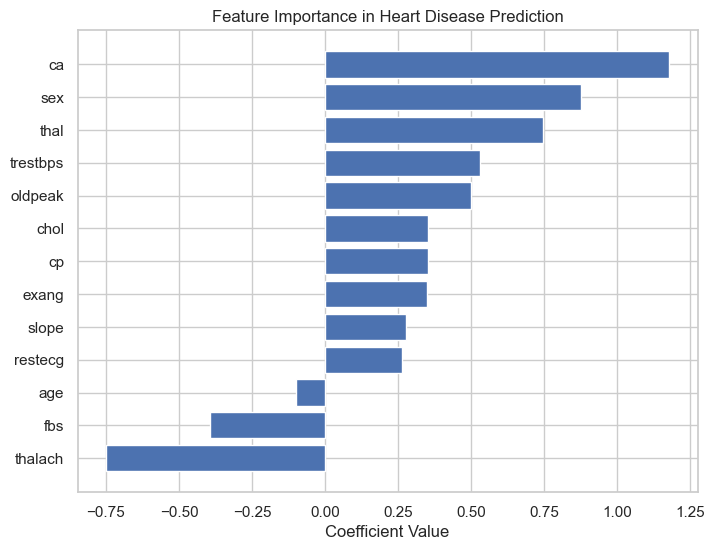

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance (coefficients)
importance = model.coef_[0]
features = X.columns

# Sort and plot
indices = np.argsort(importance)
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), features[indices])
plt.title("Feature Importance in Heart Disease Prediction")
plt.xlabel("Coefficient Value")
plt.show()
 

---

### Heart Disease Risk Summary 

|**Top 3 Risk Factors** |  **Top 3 Protective Factors** |
|----------------------------|-------------------------------|
| **1. ca (major vessels)** — More blocked vessels = higher heart disease risk. | **1. thalach (max heart rate achieved)** — Higher exercise capacity = lower risk. |
| **2. sex (male)** — Males showed higher likelihood of heart disease. | **2. fbs (fasting blood sugar)** — Slightly protective in this dataset. |
| **3. thal (thalassemia condition)** — Certain thal conditions strongly linked with heart issues. | **3. age** — Slightly negative correlation; younger individuals show less risk. |

**Insight:**  
Heart disease risk increases with blocked vessels, male gender, and abnormal thalassemia results ,while better exercise tolerance and lower resting blood sugar as a result of fasting for a given period of time show protective effects.This coincides with most medical research

---


STEP 7. Data Insights and Correlations

The correlation heatmap shows relationships between numerical features.
Features with strong positive or negative correlation to the “condition” column are most predictive of heart disease presence.

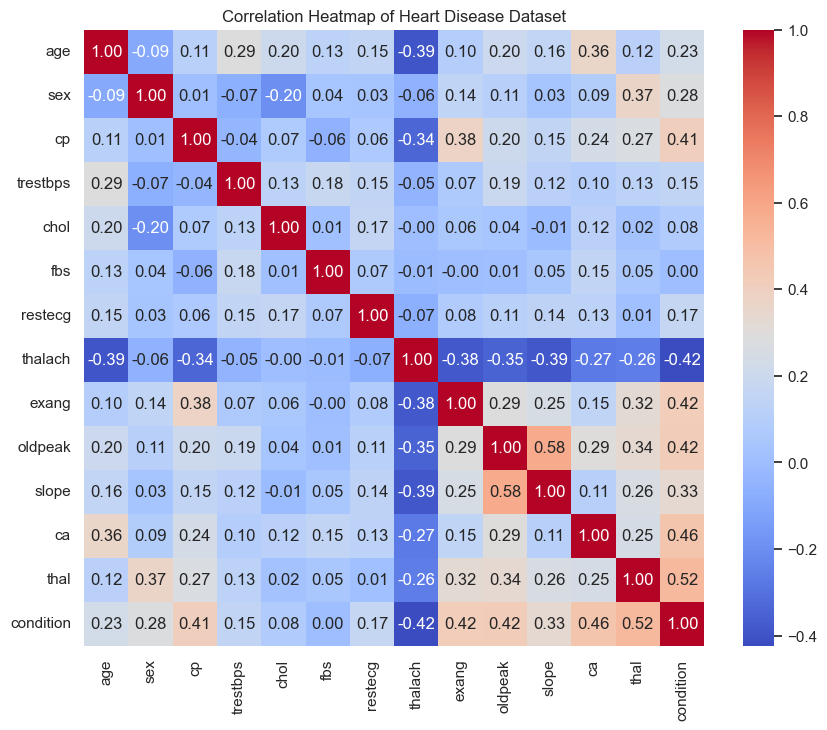

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


---

## Insights from the correlation heatmap

The heatmap above shows how different features relate to each other and to the heart disease condition.

- **Red areas** indicate strong positive correlation (features increase together-They are directly proportional).  
- **Blue areas** indicate strong negative correlation (one increases while the other decreases- indirect proportion).  
- **Neutral colors** show weak or no relationship.

### Key Observations:
| Strong Positive Correlation | Correlation | Meaning |
|-----------------------------|--------------|----------|
|Thalassemia blood disorder type `thal` | +0.52 | Abnormal thalassemia test strongly linked with heart disease |
| Number of major blood vessel `ca` | +0.46 | More major vessels affected , higher risk of heart disease |
| `oldpeak`ST depression induced by exercise  | +0.42 | Greater ST depression , higher risk of heart disease |
| `cp` | +0.41 | Certain chest pain typesare indicators of heart disease |
| `sex` | +0.28 | Males slightly more prone to heart disease as compared to females |

| Strong Negative Correlation | Correlation | Meaning |
|------------------------------|--------------|----------|
| `thalach` | -0.42 | The higher heart rate during exercise, the lower the risk of heart disease |
| `age` | -0.23 | Younger patients are less likely to have heart disease |

> The main insight is that, the most influential features (`ca`[Number of major blood vessel], `thal`[Thalassemia blood disorder type], `oldpeak`[ST depression induced by exercise (compared to rest)]) align with medical knowledge, reinforcing the model’s validity.

---
